In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
20,260 cases (7 day average) as of Fri 02 Jul, +1,019.9 since Thu 01 Jul
335 hospitalised (7 day average) as of Mon 05 Jul, +24.6 since Sun 04 Jul
14 died (7 day average) as of Fri 02 Jul, +1.3 since Thu 01 Jul


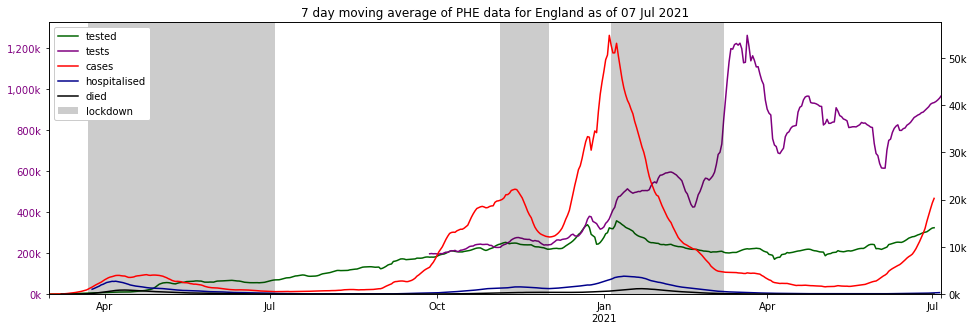

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

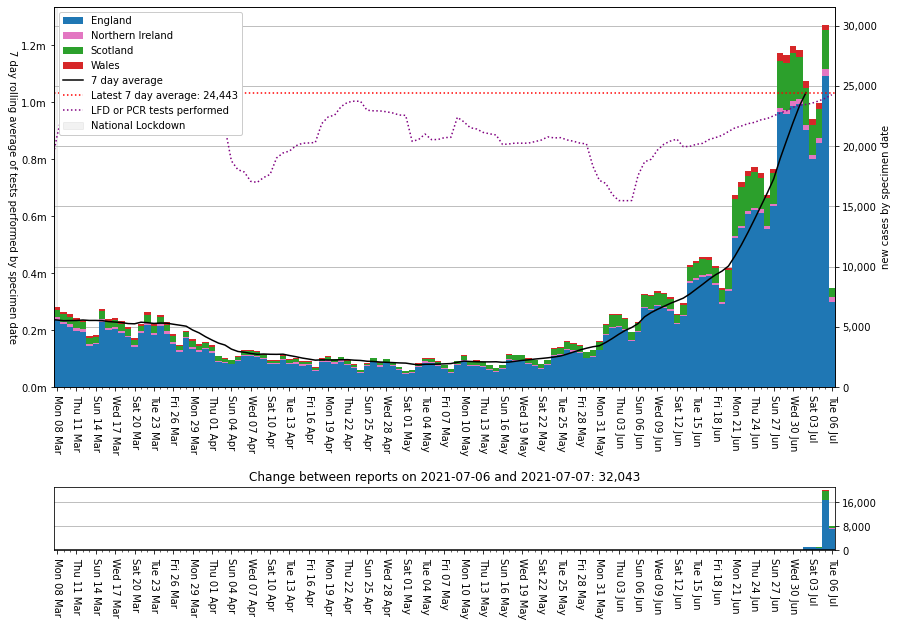

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

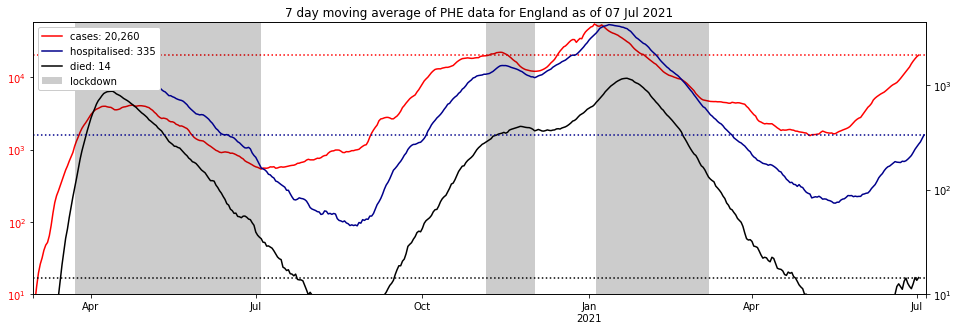

In [5]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,),
             right_series=(s.new_admissions_sum, s.new_deaths_sum))

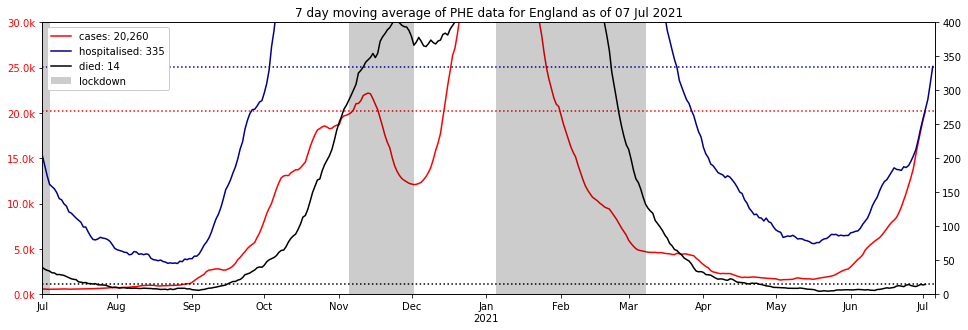

In [19]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=30_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=400)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,06 Jul 21,"+28,541,510","+38,179,540","+28,541,510","+109,148","+71,524","+109,148"
Northern Ireland,06 Jul 21,"+912,250","+1,177,136","+912,250","+7,643","+1,985","+7,643"
Scotland,06 Jul 21,"+2,808,902","+3,890,176","+2,808,902","+17,831","+10,718","+17,831"
Wales,06 Jul 21,"+1,764,640","+2,267,640","+1,764,640","+18,504","+1,584","+18,504"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,28541510.0,38179540.0,9638030.0,56286961,50.707143,17.123024,32.169832
1,Northern Ireland,N92000002,912250.0,1177136.0,264886.0,1893667,48.173729,13.987993,37.838279
2,Scotland,S92000003,2808902.0,3890176.0,1081274.0,5463300,51.414017,19.791591,28.794392
3,Wales,W92000004,1764640.0,2267640.0,503000.0,3152879,55.969163,15.953673,28.077164


'partial: 45,514,492 (68.1%), full: 34,027,302'

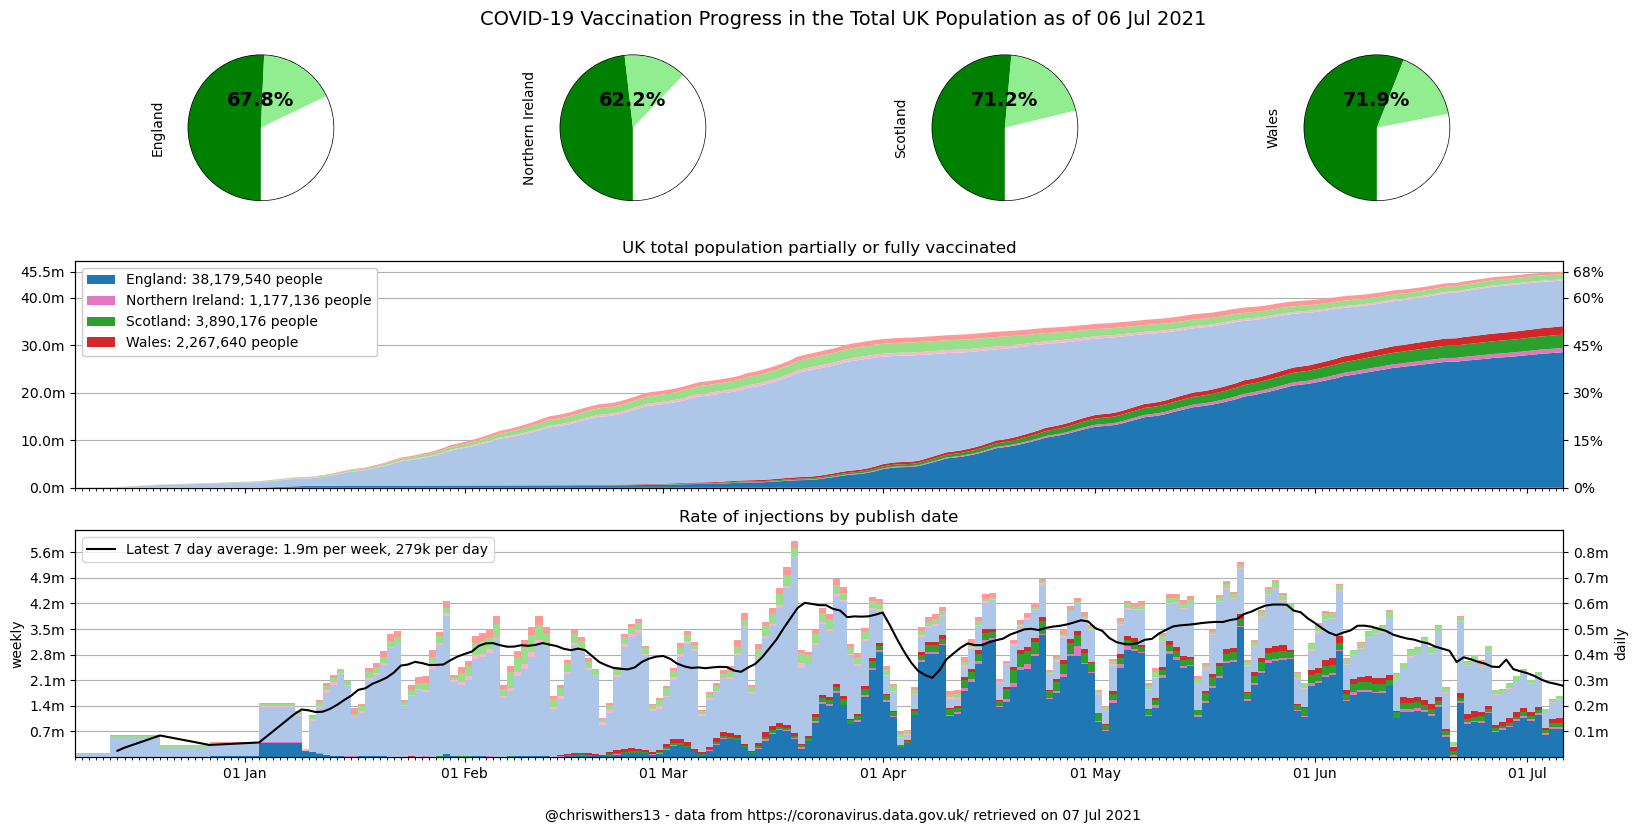

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

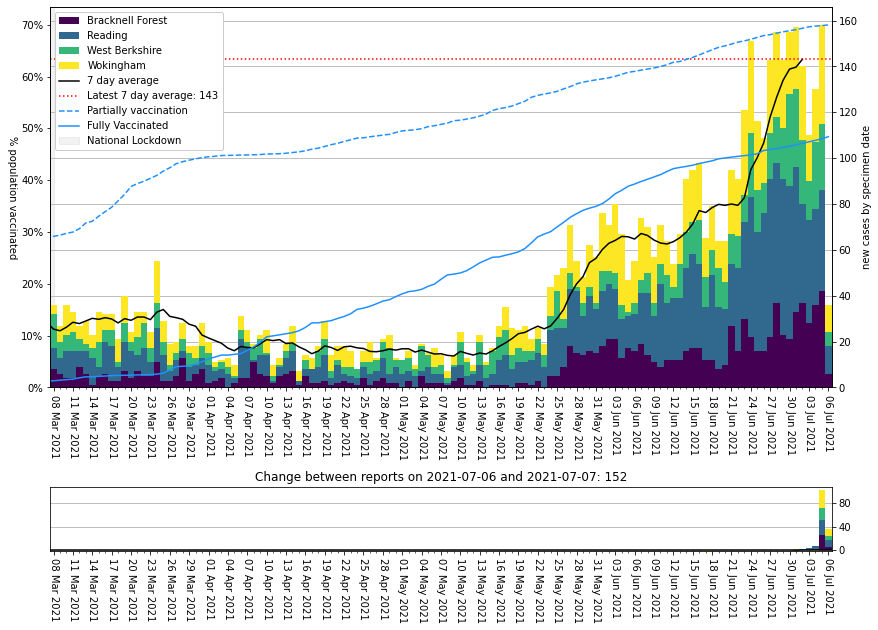

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=population_vaccinated)

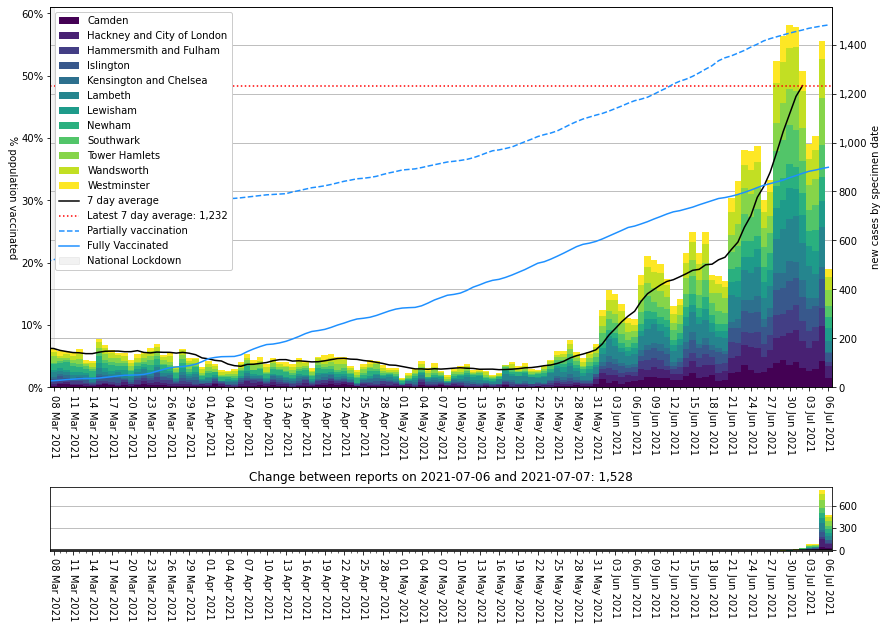

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000023,South Tyneside,994.860110,1502.0,2021-07-06
E06000012,North East Lincolnshire,733.252696,1170.0,2021-07-06
S12000042,Dundee City,731.984999,1093.0,2021-07-06
E08000024,Sunderland,723.789633,2010.0,2021-07-06
E08000021,Newcastle upon Tyne,702.727693,2128.0,2021-07-06
E08000037,Gateshead,700.304373,1415.0,2021-07-06
E07000199,Tamworth,672.786064,516.0,2021-07-06
S12000019,Midlothian,627.298291,580.0,2021-07-06
E08000022,North Tyneside,607.946593,1264.0,2021-07-06


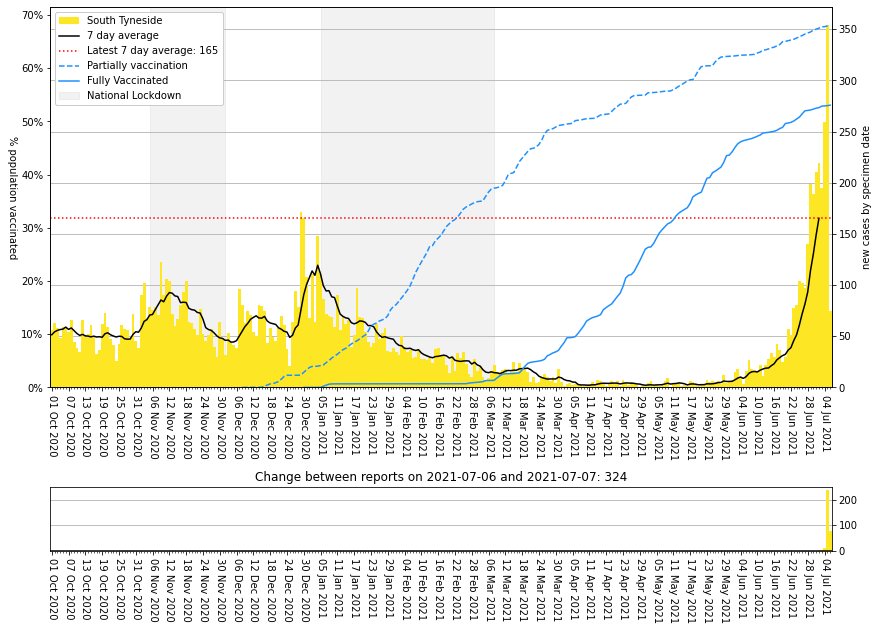

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,434.097932,3443.0,2021-07-06
E06000047,County Durham,604.043811,3202.0,2021-07-06
E08000025,Birmingham,272.898611,3116.0,2021-07-06
S12000049,Glasgow City,409.559009,2593.0,2021-07-06
S12000036,City of Edinburgh,473.205951,2484.0,2021-07-06
E08000003,Manchester,424.521306,2347.0,2021-07-06
E08000021,Newcastle upon Tyne,702.727693,2128.0,2021-07-06
E08000012,Liverpool,423.458263,2109.0,2021-07-06
E08000024,Sunderland,723.789633,2010.0,2021-07-06


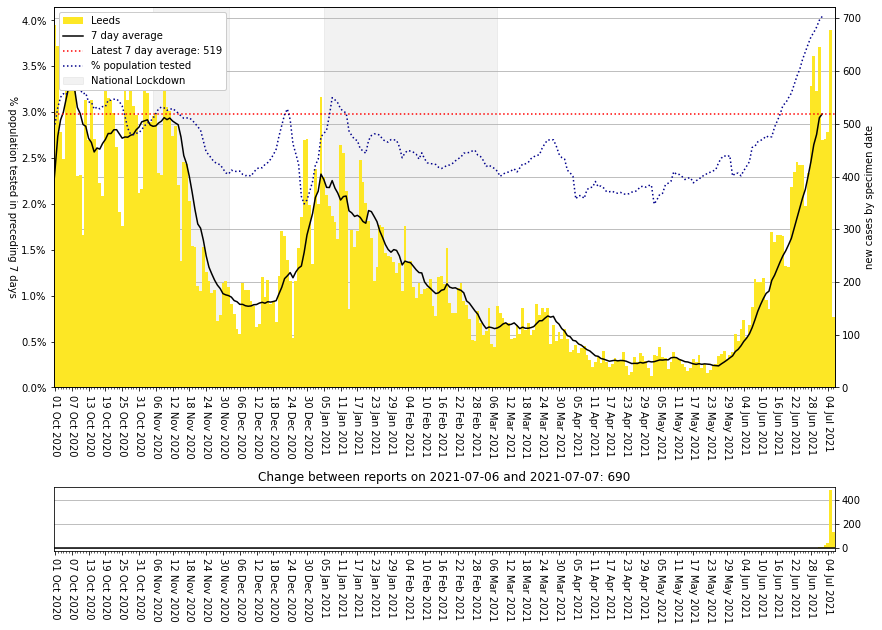

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 2.5
phe_max = 0.8

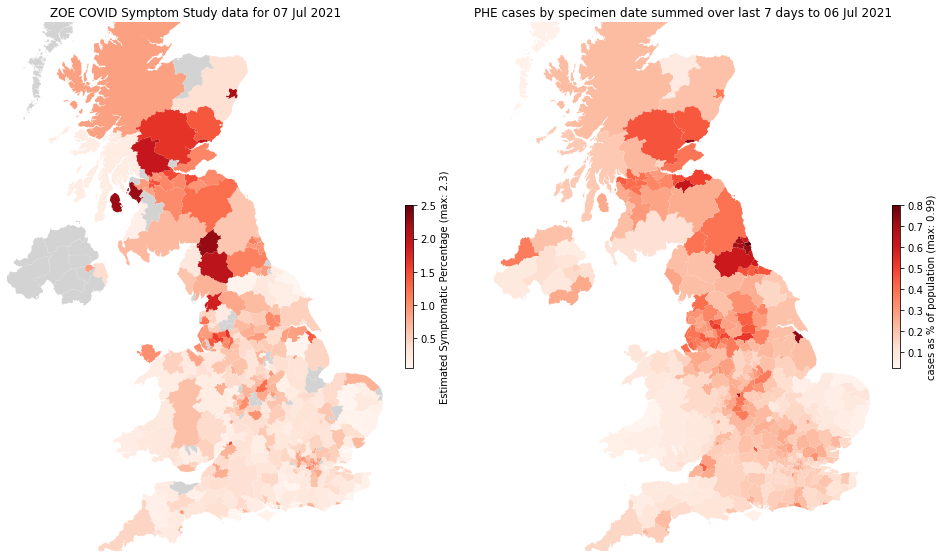

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...